In [2]:
import matplotlib.pyplot as plt
import mdtraj
import numpy as np
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import squareform
import sys,os
sys.path.append(os.path.abspath('../AS'))
from AS_Universe import AS_Universe

First we load modules

In [3]:
universe = AS_Universe()
for i in range(1, 1 + 10):
    test_ligand_path = '../Test_system/bcl2/lig/{}.pdb'.format(i)
    test_protein_path = '../Test_system/bcl2/prot/{}.pdb'.format(i)
    ligand = mdtraj.load(test_ligand_path)
    protein = mdtraj.load(test_protein_path)
    universe.set_receptor(protein, append=True)
    universe.set_binder(ligand, append=True)

Initialize universe object as container, and load trajectories.
Here we load 10 snapshots taken from bcl2 simulation

In [4]:
for i in range(universe.n_frames):
    universe.run(i) # process each frame
    print('frame {} processed'.format(i))

frame 0 processed
frame 1 processed
frame 2 processed
frame 3 processed
frame 4 processed
frame 5 processed
frame 6 processed
frame 7 processed
frame 8 processed
frame 9 processed


Use a for loop to process all frames, or if you have a multi core cpu you can run this in parellel. 

In [5]:
universe.config.screen_by_face = True
universe.config.screen_by_ligand_contact = False
universe.screen_pockets()

Screen pocket based on contact surface

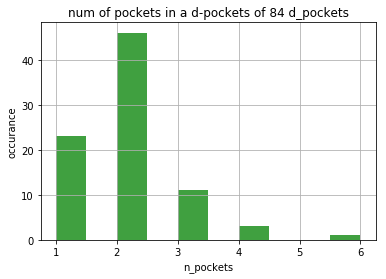

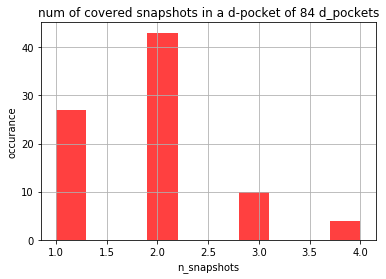

In [7]:
n_pockets = []
n_snapshots = []
for d_pocket in universe.d_pockets:
    n_pockets.append(d_pocket.n_pockets)
    n_snapshots.append(d_pocket.n_snapshots)

n, bins, patches = plt.hist(n_pockets, facecolor='g', alpha=0.75)

plt.xlabel('n_pockets')
plt.ylabel('occurance')
plt.title('num of pockets in a d-pockets of {} d_pockets'.format(len(n_snapshots)))
# plt.axis([1, 6,0,max(n)+10])
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(n_snapshots, facecolor='r', alpha=0.75)
plt.xlabel('n_snapshots')
plt.ylabel('occurance')
plt.title('num of covered snapshots in a d-pocket of {} d_pockets'.format(len(n_snapshots)))
# plt.axis([1, 6,0,max(n)+10])
plt.grid(True)
plt.show()

now we can start processing the pockets and d-pockets.
First, let's look at the size of all d-pockets, and how many snapshots they cover

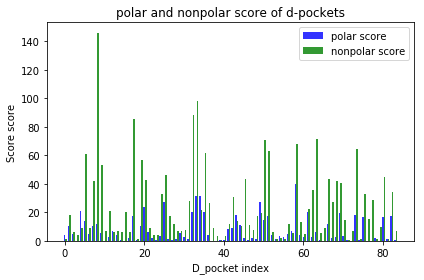

In [8]:
ave_polar_nonpolar = []
std_polar_nonpolar = []
for d_pocket in universe.d_pockets:
    scores = np.array([a for a in d_pocket.pocket_scores])
    average = np.average(scores, axis=0)
    ave_polar_nonpolar.append(np.average(scores, axis=0))
    std_polar_nonpolar.append(np.std(scores,axis=0))
ave_polar_nonpolar = np.array(ave_polar_nonpolar)
std_polar_nonpolar = np.array(std_polar_nonpolar)

fig, ax = plt.subplots()
index = np.arange(len(ave_polar_nonpolar))
bar_width = 0.4
opacity = 0.8

polar_rect = plt.bar(index, ave_polar_nonpolar[:,0], bar_width,
                 alpha=opacity,
                 color='b',
                 label='polar score')
 
nonpolar_rect = plt.bar(index + bar_width, ave_polar_nonpolar[:,1], bar_width,
                 alpha=opacity,
                 color='g',
                 label='nonpolar score')

plt.xlabel('D_pocket index')
plt.ylabel('Score score')
plt.title('polar and nonpolar score of d-pockets')
# plt.xticks(index + bar_width, range(1,len(index)+1))
plt.legend()
 
plt.tight_layout()
plt.show()

There seems to be quite a bit noise in our d-pockets, so let's limit it to ones occupying more than 20% of all snapshots.

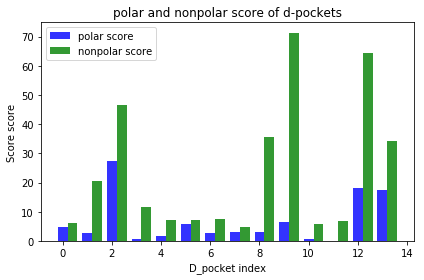

In [9]:
ave_polar_nonpolar = []
std_polar_nonpolar = []
for d_pocket in universe.d_pockets:
    if d_pocket.n_snapshots < 3:
        continue
    scores = np.array([a for a in d_pocket.pocket_scores])
    average = np.average(scores, axis=0)
    ave_polar_nonpolar.append(np.average(scores, axis=0))
    std_polar_nonpolar.append(np.std(scores,axis=0))
ave_polar_nonpolar = np.array(ave_polar_nonpolar)
std_polar_nonpolar = np.array(std_polar_nonpolar)

fig, ax = plt.subplots()
index = np.arange(len(ave_polar_nonpolar))
bar_width = 0.4
opacity = 0.8

polar_rect = plt.bar(index, ave_polar_nonpolar[:,0], bar_width,
                 alpha=opacity,
                 color='b',
                 label='polar score')
 
nonpolar_rect = plt.bar(index + bar_width, ave_polar_nonpolar[:,1], bar_width,
                 alpha=opacity,
                 color='g',
                 label='nonpolar score')

plt.xlabel('D_pocket index')
plt.ylabel('Score score')
plt.title('polar and nonpolar score of d-pockets')
# plt.xticks(index + bar_width, range(1,len(index)+1))
plt.legend()
 
plt.tight_layout()
plt.show()
